# <span style="color:orange">Initial setup</span>

As a first step, we import all the relevant python libraries that we will need for our analysis, such as numpy, pandas, statsmodels, and scikit-learn. Then, we import our csv dataset, using the 'read_csv()' command.

Once our dataset is loaded we can inspect the data using the head() method to have a quick look at what columns and what kind of data we have available to work with.

In [2]:
# Import Modules
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML


#Getting the data
df = pd.read_csv('Churn_simple_approach.csv')
display(df.head(5))

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


# <span style="color:orange">Exploration and Cleaning</span>

Now we can perform some basic exploratory analysis to get a better understanding of what is in our data.

* How much data we have
* If there are any missing values
* What data type each column is
* The distribution of data in each column


We could also take this opportunity to plot some charts to help us get an idea of what variables / features will prove useful. For example, if we where thinking of doing some regression analysis, scatter charts could give us a visual indication of correlation between features.

The pandas library has plenty of built in functions to help us quickly understand summary information about our dataset.
Below we use the shape() method to check how many rows are in our dataset and the describe() method to confirm whether or not our columns have missing values.

In [3]:
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

('Number of rows: ', 3333)


,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
Count of values,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0


# <span style="color:orange">Feature Selection</span>

After cleaning and inspecting our data we might come to the conclusion that certain columns are not going to be useful for prediction. 
In this example we will not be using the phone-number of the client or geographical information about the client because our assumption is that this shouldn't affect churn.

Often during a data science project, this is the point where we would enrich our data with additional sources (social media feeds, weather and location data, 3rd party data) and perform any transformations we needed such as aggregations, normalization, imputation, etc. New features can also be created from existing features, for instance, the log() of a feature might be more suitable than the original, or a categorical feature could be encoded.

In [4]:
# Drop the columns that we have decided won't be used in prediction
df = df.drop(["Phone", "Area Code", "State"], axis=1)
features = df.drop(["Churn"], axis=1).columns

# <span style="color:orange">Fitting a Model</span>

A this point we can construct our model. The first thing to do is split our dataset into training and test sets. We will take a simple approach and take a 75:25 randomly sampled split.

In [5]:
df_train, df_test = train_test_split(df, test_size=0.25)

Once we have obtained our split we can use the RandomForestClassifier() from the sklearn library as our model. We initialise our model, fit it to our dataset using the fit() method, then simply make our predictions using the predict() method.

In [6]:
# Set up our RandomForestClassifier instance and fit to data
clf = RandomForestClassifier(n_estimators=30)
clf.fit(df_train[features], df_train["Churn"])

# Make predictions
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,


Given the ease of setting up a basic model, a common approach is to initialise and train a variety of different models and pick the most performant one as a starting point. 

For example, we might also choose to run a support vector machine and a neural network alongside our random forest and then select the best performing of them to refine.


If we display the results we can see we have a list of booleans (0's and 1's) representing whether or not our model thinks a customer has churned or not. Now we can compare this to whether they actually churned to evaluate our model. We could also compute the actual probabilities of a customer churning using predict_proba() rather than just simple yes / no. We could then use these probabilities as a threshold for driving business decisions around which customers we need to target for retention, and how strong an incentive we need to offer them.
We can achieve the comparison mentioned above by using the .score() method, and displaying that we can see that we have achieved an accuracy of over 90%, which is not bad for our first attempt.


In [7]:
score = clf.score(df_test[features], df_test["Churn"])
print("Accuracy: ", score)

('Accuracy: ', 0.93764988009592332)


We can also construct a confusion matrix and and a ROC curve to dig further into the quality of our results. In a more rigorous exercise part of this stage would be to determine the most suitable scoring metric/s for our situation, undertake more robust checks of our chosen metrics, and attempt to reduce / avoid issues such as over-fitting by using methods such as k-fold cross validation.

,Predicted False,Predicted True
Actual False,693,9
Actual True,43,89


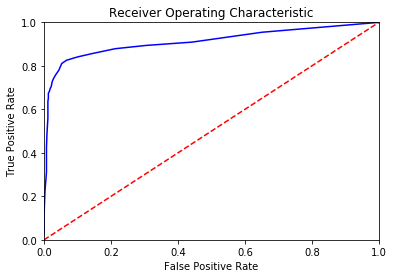

In [8]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["Churn"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(df_test["Churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We can also plot feature importance to gain some insight as to what features were most useful in our model, which will be of great help when refining our model in the future.

,importance,labels
10,0.173752,Day Charge
2,0.132019,Day Mins
6,0.129690,CustServ Calls
3,0.072974,Eve Mins
7,0.067192,Int'l Plan


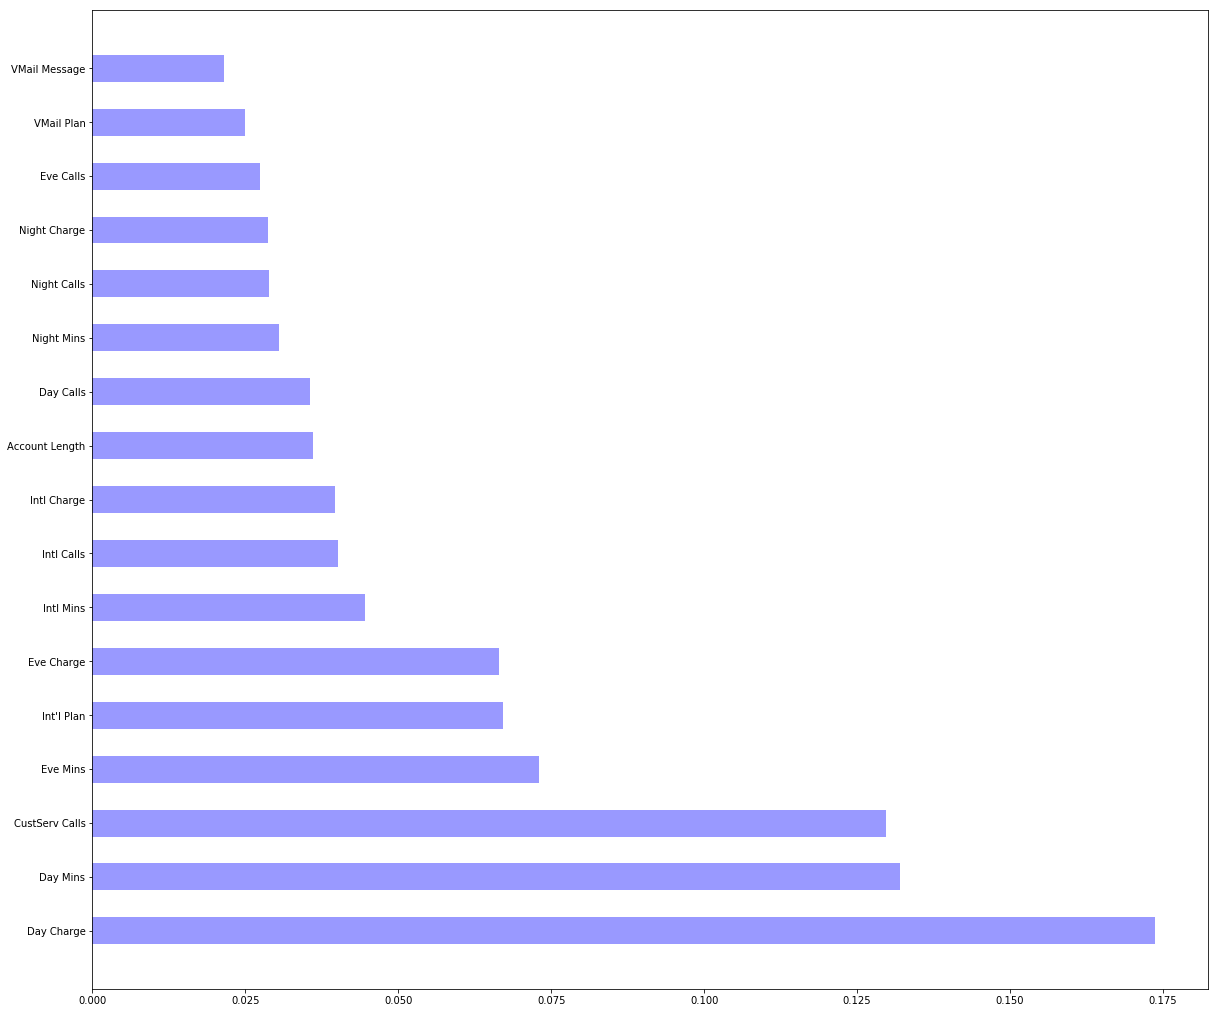

In [9]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

# Results



The output of this exercise is a corresponding score (representing churn propensity) for each client, as can been seen below. For insight into how these scores could be leveraged by your business, keep reading the next section.

In [15]:
df_test["prob_true"] = probs[:, 1]
df_risky = df_test[df_test["prob_true"] > 0.9]
display(df_risky.head(5)[["prob_true"]])

C:\Users\diozel\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,prob_true
365,1.000000
832,1.000000
3272,0.933333
1472,0.933333
2103,0.933333
